  Centrality | 'betweenness'
    0.248237 | '"SN100"' (7)
    0.213324 | '"Beescratch"' (8)
    0.143150 | '"SN9"' (8)
    0.138570 | '"SN4"' (11)
    0.118239 | '"DN63"' (5)
    0.114300 | '"Jet"' (9)
    0.102646 | '"Kringel"' (9)
    0.099122 | '"Upbang"' (7)
    0.084677 | '"Trigger"' (10)
    0.084205 | '"Web"' (9)
    0.070517 | '"SN89"' (2)
    0.066757 | '"Oscar"' (5)
    0.065529 | '"Patchback"' (9)
    0.062831 | '"Stripes"' (7)
    0.061972 | '"Grin"' (12)

               Graph | 'Original social network'
               Nodes | 10,680
               Edges | 24,316
              Degree | 4.55
     Max node degree | 205.00
                 LCC | 1.00
            Distance | 7.33 (22)
             Density | 0.000426403
          Clustering | 0.265945224


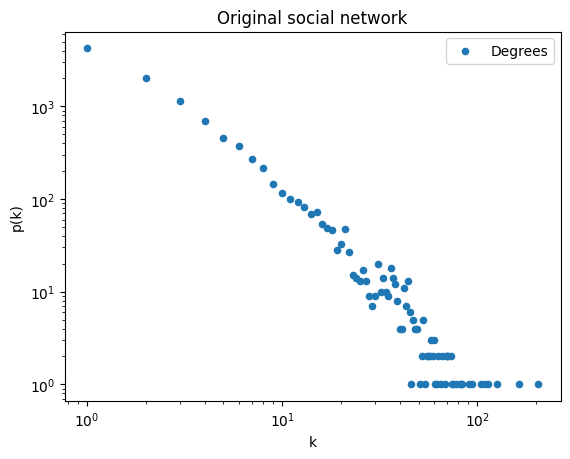

               Graph | 'Induced social network'
               Nodes | 1,602
               Edges | 7,647
              Degree | 9.55
     Max node degree | 172.00
                 LCC | 1.00
            Distance | 5.20 (14)
             Density | 0.005963033
          Clustering | 0.452816246


<Figure size 640x480 with 0 Axes>

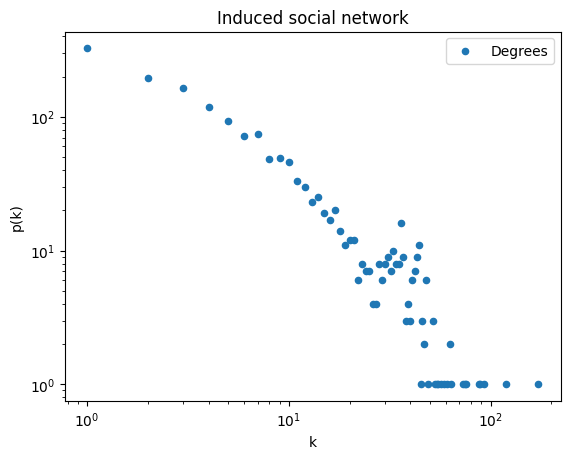

WHOLE/LFR_00_0.net
WHOLE/LFR_00_1.net
WHOLE/LFR_00_2.net
WHOLE/LFR_00_3.net
WHOLE/LFR_00_4.net
WHOLE/LFR_00_5.net
WHOLE/LFR_00_6.net
WHOLE/LFR_00_7.net
WHOLE/LFR_00_8.net
WHOLE/LFR_00_9.net
WHOLE/LFR_00_10.net
WHOLE/LFR_00_11.net
WHOLE/LFR_00_12.net
WHOLE/LFR_00_13.net
WHOLE/LFR_00_14.net
WHOLE/LFR_00_15.net
WHOLE/LFR_00_16.net
WHOLE/LFR_00_17.net
WHOLE/LFR_00_18.net
WHOLE/LFR_00_19.net
WHOLE/LFR_00_20.net
WHOLE/LFR_00_21.net
WHOLE/LFR_00_22.net
WHOLE/LFR_00_23.net
WHOLE/LFR_00_24.net
WHOLE/LFR_02_0.net
WHOLE/LFR_02_1.net
WHOLE/LFR_02_2.net
WHOLE/LFR_02_3.net
WHOLE/LFR_02_4.net
WHOLE/LFR_02_5.net
WHOLE/LFR_02_6.net
WHOLE/LFR_02_7.net
WHOLE/LFR_02_8.net
WHOLE/LFR_02_9.net
WHOLE/LFR_02_10.net
WHOLE/LFR_02_11.net
WHOLE/LFR_02_12.net
WHOLE/LFR_02_13.net
WHOLE/LFR_02_14.net
WHOLE/LFR_02_15.net
WHOLE/LFR_02_16.net
WHOLE/LFR_02_17.net
WHOLE/LFR_02_18.net
WHOLE/LFR_02_19.net
WHOLE/LFR_02_20.net
WHOLE/LFR_02_21.net
WHOLE/LFR_02_22.net
WHOLE/LFR_02_23.net
WHOLE/LFR_02_24.net
WHOLE/LFR_04_0.net
W

ValueError: x and y must have same first dimension, but have shapes (5,) and (11,)

<Figure size 640x480 with 0 Axes>

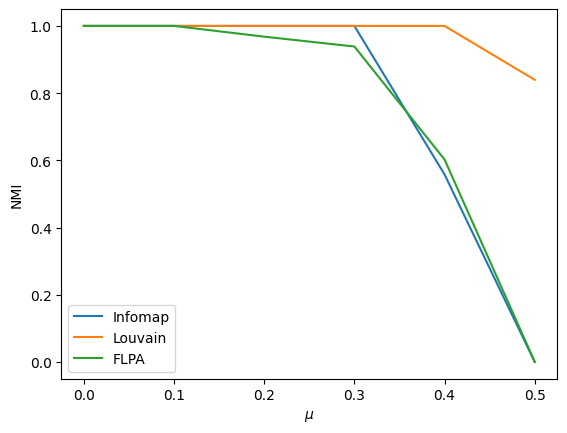

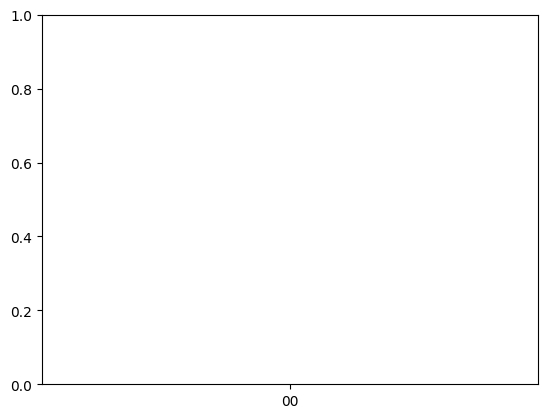

In [18]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, deque, defaultdict
from cdlib.classes import NodeClustering
from cdlib import algorithms

def draw_graph(G: nx.Graph, **kwargs):
    plt.title(G.name)
    nx.draw(G, with_labels=True, **kwargs)
    plt.show()

def read_with_clusters(path):
	G = nx.MultiGraph()
	with open(path, 'r') as file:
		line = file.readline()
		n = int(line.strip().split(" ")[1])
		for i in range(n):
			parts = file.readline().strip().split(" ")
			id = int(parts[0])
			label = parts[1]
			cluster_id = int(parts[2])
			G.add_node(id, label=label, cluster=cluster_id)
		line = file.readline()
		m = int(line.strip().split(" ")[1])
		for _ in range(m):
			parts = file.readline().strip().split(" ")
			G.add_edge(int(parts[0]), int(parts[1]))
			
	return G

def distance(G, i):
	D = [-1] * len(G) # D = {}
	Q = deque()
	D[i] = 0
	Q.append(i)
	while Q:
		i = Q.popleft()
		for j in G[i]:
			if D[j] == -1: # if j not in D:
				D[j] = D[i] + 1
				Q.append(j)
	return [d for d in D if d > 0]

def distances(G, n = 100):
	D = []
	approx = G.nodes()
	if len(G) > n:
		approx = random.sample(list(G.nodes()), n)
	for i in approx:
		D.append(distance(G, i))
	return D

def lcc(G: nx.Graph) -> float:
    """relative size of the largest connected component (between 0 and 1)"""
    if G.is_directed(): G = nx.Graph(G)

    return len(max(nx.connected_components(G), key=len)) / len(G)

def distribution(G):
	degrees = np.array(sorted([G.degree(n) for n in G.nodes()], reverse=True))
	count_general = Counter(degrees)
	fig = plt.figure()
	plt.xscale("log")
	plt.yscale("log")
	general_dist = plt.scatter(count_general.keys(), count_general.values(), label="Degrees", s=20)
	plt.xlabel("k")
	plt.ylabel("p(k)")
	plt.legend()
	plt.title(G.name)
	plt.show()
	plt.savefig(f"{G.name}")

def info(G):
	print("{:>20s} | '{:s}'".format('Graph', G.name))
	n = G.number_of_nodes()
	print("{:>20s} | {:,d}".format('Nodes', n))
	m = G.number_of_edges()
	print("{:>20s} | {:,d}".format('Edges', m))
	k = 2*m/n
	print("{:>20s} | {:.2f}".format('Degree', k))
	max_degree = max([G.degree(n) for n in G.nodes()])
	print("{:>20s} | {:.2f}".format('Max node degree', max_degree))
	cc = lcc(G)
	print("{:>20s} | {:.2f}".format('LCC', cc))
	G2 = G
	if type(G2) == nx.MultiGraph:
		G2 = nx.Graph(G)
	dis = [i for d in distances(G2) for i in d]
	print("{:>20s} | {:.2f} ({:,d})".format('Distance', sum(dis) / len(dis), max(dis)))
	density = k/(n-1)
	print("{:>20s} | {:.9f}".format('Density', density))
	clustering = nx.average_clustering(G)
	print("{:>20s} | {:.9f}".format('Clustering', clustering))
	distribution(G)

def top_nodes(G: nx.Graph, C: dict[any, float], centrality: str, n=15) -> dict[any]:
    """prints and returns top n nodes by given measure of centrality"""

    # OPT take callable instead of dict, only compute centrality on non-mode nodes
    # OPT np.argpartition instead of sort
    print("{:>12s} | '{:s}'".format('Centrality', centrality))
    nodes = []
    for i, c in sorted(C.items(), key=lambda item: (item[1], G.degree[item[0]]), reverse=True):
        if not G.nodes[i]['label'].startswith('m-'):
            nodes.append(G.nodes[i])
            print("{:>12.6f} | '{:s}' ({:,d})".format(
                c, G.nodes[i]['label'], G.degree[i]))
            n -= 1
            if n == 0:
                break
    print()
    return nodes

def random_walk(G):
	n = G.number_of_nodes()
	visited = set([])
	current = random.sample(list(G.nodes()), 1)[0]
	while len(visited)/n < 0.15:
		visited.add(current)
		current = random.sample(list(G[current]), 1)[0]
	return nx.convert_node_labels_to_integers(nx.Graph(nx.induced_subgraph(G, visited)))

def generate_gn(mi = 0.1):
    G = nx.MultiGraph(name="girvan_newman")
    for i in range(72):
        G.add_node(i, cluster=i // 24 + 1)
    for i in range(72):
        for j in range(i+1, 72):
            if G.nodes[i]['cluster'] == G.nodes[j]['cluster']:
                if random.random() < 20*(1-mi)/23:
                    G.add_edge(i,j)
            else:
                if random.random() < 5*mi/18:
                    G.add_edge(i,j)
    return G

def known_clustering(G: nx.Graph, cluster_attr="value") -> NodeClustering:
    """Extracts known node clustering from their attrubute with supplied name."""
    C = defaultdict(list)
    for i, d in G.nodes(data=True):
        C[d[cluster_attr]].append(i)
    return NodeClustering(list(C.values()), G, "Known")

def fast_label_propagation(G):
    assert (type(G) == nx.MultiGraph)
    N = list(G.nodes())
    random.shuffle(N)
    Q = deque(N)
    S = [True] * len(G)
    C = [i for i in range(len(G))]
    while Q:
        i = Q.popleft()
        S[i] = False
        if len(G[i]) > 0:
            L = {}
            for j in G[i]:
                if C[j] not in L:
                    L[C[j]] = 0
                L[C[j]] += len(G[i][j])
            maxl = max(L.values())
            c = random.choice([c for c in L if L[c] == maxl])
            if C[i] != c:
                C[i] = c
                for j in G[i]:
                    if C[j] != c and not S[j]:
                        Q.append(j)
                        S[j] = True
    L = {}
    for i in N:
        if C[i] in L:
            L[C[i]].append(i)
        else:
            L[C[i]] = [i]
    return NodeClustering(list(L.values()), G)

def get_neighbourhood(G, node, level=3):
    neighbourhood = set()
    queue = deque([node])
    for _ in range(level):
        current = deque()
        while queue:
            current.extend([n for n in G[queue.popleft()]])
        while current:
            n = current.popleft()
            if n not in neighbourhood:
                neighbourhood.add(n)
                queue.append(n)
    return list(neighbourhood)

# Prva naloga
G = nx.convert_node_labels_to_integers(read_with_clusters("dolphins.net"), label_attribute=None)
betweenness_cent = top_nodes(G, nx.betweenness_centrality(G), 'betweenness')

# Druga naloga
network =  'social'
file = f"{network}.net"
G = nx.Graph(nx.convert_node_labels_to_integers(nx.read_pajek(file)))
G.name = "Original social network"
info(G)
SG = nx.Graph(random_walk(G))
SG.name = "Induced social network"
info(SG)

# Cetrta
iters = 25
algs = {"Infomap": algorithms.infomap, "Louvain": algorithms.louvain,
        "FLPA": fast_label_propagation}
res = {alg: [] for alg in algs.keys()}
mis = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
plt.figure()
for alg in algs:
    for mi in mis:
        nmi = 0
        for _ in range(iters):
            G = nx.MultiGraph(generate_gn(mi))
            K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nmi += K.normalized_mutual_information(C).score
        nmi /= iters
        res[alg].append(nmi)
    plt.plot(mis, res[alg], label=alg)
plt.xlabel('$\mu$')
plt.ylabel('NMI')
plt.legend()

mis = ["00", "02", "04", "06", "08"]
res = {alg: [] for alg in algs.keys()}
plt.figure()
for alg in algs:
    for mi in mis:
        nmi = 0
        for i in range(iters):
            netpath = f"WHOLE/LFR_{mi}_{i}.net"
            print(netpath)
            G = nx.convert_node_labels_to_integers(read_with_clusters(netpath))
            K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nmi += K.normalized_mutual_information(C).score
        nmi /= iters
        res[alg].append(nmi)
    plt.plot(mis, res[alg], label=alg)
plt.xlabel('$\mu$')
plt.ylabel('NMI')
plt.legend()

iters = 25
n = 1000
algs = {"FLPA": fast_label_propagation, "Infomap": algorithms.infomap, "Louvain": algorithms.louvain}
res = {alg: [] for alg in algs.keys()}
degrees = [8, 16, 24, 32, 40]
plt.figure()
for alg in algs:
    for deg in degrees:
        print(f"{alg}, {deg}")
        nvi = 0
        for i in range(iters):
            G = nx.MultiGraph(nx.gnm_random_graph(n, deg*n/2))
            cc = nx.connected_components(G)
            K = NodeClustering(list(cc), G)
            #K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nvi += K.variation_of_information(C).score / np.log(n)
        nvi /= iters
        res[alg].append(nvi)
    plt.plot(degrees, res[alg], label=alg)
plt.xlabel('Average degree')
plt.ylabel('NVI')
plt.legend()

# Peta


G = nx.Graph(nx.convert_node_labels_to_integers(read_with_clusters('aps_2008_2013.net')))
G13 = [i for i in range(len(G)) if G.nodes()[i]['label'].endswith('-2013"')]
iters = 10
accuracies = []
for i in range(iters):
    correct = 0
    print(f"Iteration {i}")
    for node in G13:
        right_cluster = get_neighbourhood(G, node, level=2)
        journals = [G.nodes()[n]['cluster'] for n in right_cluster if not G.nodes()[n]['label'].endswith('-2013"')]
        most = Counter(journals).most_common()
        if len(most) == 0:
            most = [(random.randint(1,10), 0)]
        predicted = G.nodes()[node]['cluster']
        if most[0][0] == predicted:
            correct += 1
    acc = correct*100/len(G13)
    print(f"Accuracy: {acc}%")
    accuracies.append(acc)
print(accuracies)
print(sum(accuracies)/len(accuracies))


WHOLE/LFR_00_0.net
WHOLE/LFR_00_1.net
WHOLE/LFR_02_0.net
WHOLE/LFR_02_1.net
WHOLE/LFR_04_0.net
WHOLE/LFR_04_1.net
WHOLE/LFR_06_0.net
WHOLE/LFR_06_1.net
WHOLE/LFR_08_0.net
WHOLE/LFR_08_1.net
WHOLE/LFR_00_0.net
WHOLE/LFR_00_1.net
WHOLE/LFR_02_0.net
WHOLE/LFR_02_1.net
WHOLE/LFR_04_0.net
WHOLE/LFR_04_1.net
WHOLE/LFR_06_0.net
WHOLE/LFR_06_1.net
WHOLE/LFR_08_0.net
WHOLE/LFR_08_1.net
WHOLE/LFR_00_0.net
WHOLE/LFR_00_1.net
WHOLE/LFR_02_0.net
WHOLE/LFR_02_1.net
WHOLE/LFR_04_0.net
WHOLE/LFR_04_1.net
WHOLE/LFR_06_0.net
WHOLE/LFR_06_1.net
WHOLE/LFR_08_0.net
WHOLE/LFR_08_1.net


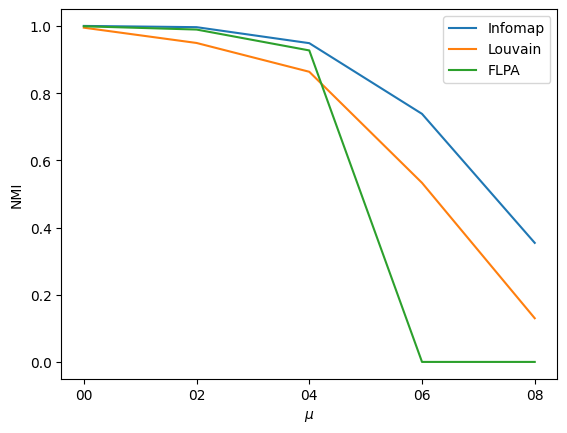

In [21]:
mis = ["00", "02", "04", "06", "08"]
res = {alg: [] for alg in algs.keys()}
plt.figure()
for alg in algs:
    for mi in mis:
        nmi = 0
        for i in range(iters):
            netpath = f"WHOLE/LFR_{mi}_{i}.net"
            print(netpath)
            G = nx.convert_node_labels_to_integers(read_with_clusters(netpath))
            K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nmi += K.normalized_mutual_information(C).score
        nmi /= iters
        res[alg].append(nmi)
    plt.plot(mis, res[alg], label=alg)
plt.xlabel('$\mu$')
plt.ylabel('NMI')
plt.legend()

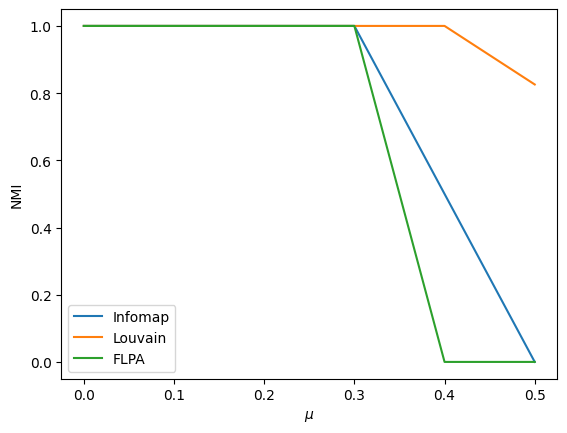

In [19]:
# Cetrta
iters = 2
algs = {"Infomap": algorithms.infomap, "Louvain": algorithms.louvain,
        "FLPA": fast_label_propagation}
res = {alg: [] for alg in algs.keys()}
mis = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
plt.figure()
for alg in algs:
    for mi in mis:
        nmi = 0
        for _ in range(iters):
            G = nx.MultiGraph(generate_gn(mi))
            K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nmi += K.normalized_mutual_information(C).score
        nmi /= iters
        res[alg].append(nmi)
    plt.plot(mis, res[alg], label=alg)
plt.xlabel('$\mu$')
plt.ylabel('NMI')
plt.legend()


               Graph | 'Original social network'
               Nodes | 10,680
               Edges | 24,316
              Degree | 4.55
     Max node degree | 205.00
                 LCC | 1.00
            Distance | 7.31 (19)
             Density | 0.000426403
          Clustering | 0.265945224


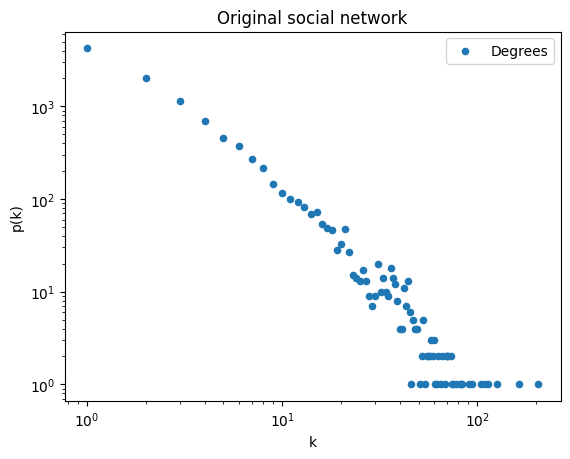

               Graph | 'Induced social network'
               Nodes | 1,602
               Edges | 7,724
              Degree | 9.64
     Max node degree | 168.00
                 LCC | 1.00
            Distance | 5.57 (14)
             Density | 0.006023077
          Clustering | 0.464729268


<Figure size 640x480 with 0 Axes>

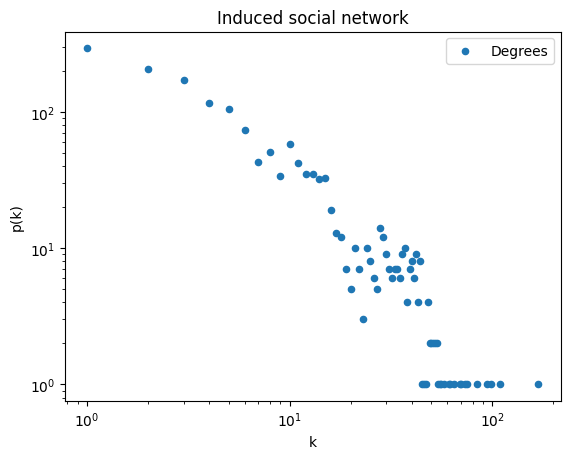

<Figure size 640x480 with 0 Axes>

In [16]:
network =  'social'
file = f"{network}.net"
G = nx.Graph(nx.convert_node_labels_to_integers(nx.read_pajek(file)))
G.name = "Original social network"
info(G)
SG = nx.Graph(random_walk(G))
SG.name = "Induced social network"
info(SG)

In [17]:
def generate_gn(mi = 0.1):
    G = nx.MultiGraph(name="girvan_newman")
    for i in range(72):
        G.add_node(i, cluster=i // 24 + 1)
    for i in range(72):
        for j in range(i+1, 72):
            if G.nodes[i]['cluster'] == G.nodes[j]['cluster']:
                if random.random() < 20*(1-mi)/23:
                    G.add_edge(i,j)
            else:
                if random.random() < 5*mi/18:
                    G.add_edge(i,j)
    return G

def known_clustering(G: nx.Graph, cluster_attr="value") -> NodeClustering:
    """Extracts known node clustering from their attrubute with supplied name."""
    C = defaultdict(list)
    for i, d in G.nodes(data=True):
        C[d[cluster_attr]].append(i)
    return NodeClustering(list(C.values()), G, "Known")

def fast_label_propagation(G):
    assert (type(G) == nx.MultiGraph)
    N = list(G.nodes())
    random.shuffle(N)
    Q = deque(N)
    S = [True] * len(G)
    C = [i for i in range(len(G))]
    while Q:
        i = Q.popleft()
        S[i] = False
        if len(G[i]) > 0:
            L = {}
            for j in G[i]:
                if C[j] not in L:
                    L[C[j]] = 0
                L[C[j]] += len(G[i][j])
            maxl = max(L.values())
            c = random.choice([c for c in L if L[c] == maxl])
            if C[i] != c:
                C[i] = c
                for j in G[i]:
                    if C[j] != c and not S[j]:
                        Q.append(j)
                        S[j] = True
    L = {}
    for i in N:
        if C[i] in L:
            L[C[i]].append(i)
        else:
            L[C[i]] = [i]
    return NodeClustering(list(L.values()), G)


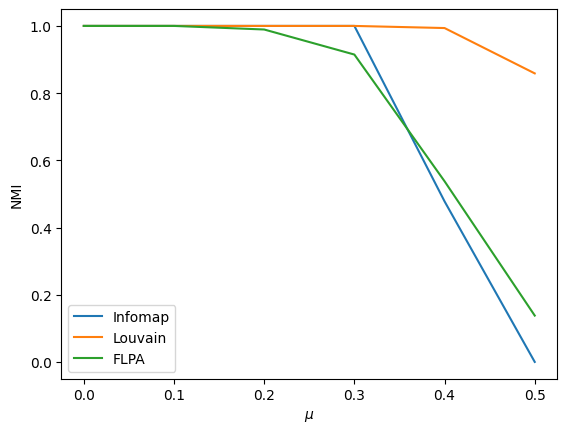

In [5]:
iters = 25
algs = {"Infomap": algorithms.infomap, "Louvain": algorithms.louvain,
        "FLPA": fast_label_propagation}
res = {alg: [] for alg in algs.keys()}
mis = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

plt.figure()
for alg in algs:
    for mi in mis:
        nmi = 0
        for _ in range(iters):
            G = nx.MultiGraph(generate_gn(mi))
            K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nmi += K.normalized_mutual_information(C).score
        nmi /= iters
        res[alg].append(nmi)
    plt.plot(mis, res[alg], label=alg)

plt.xlabel('$\mu$')
plt.ylabel('NMI')
plt.legend()


WHOLE/LFR_00_0.net
WHOLE/LFR_00_1.net
WHOLE/LFR_00_2.net
WHOLE/LFR_00_3.net
WHOLE/LFR_00_4.net
WHOLE/LFR_00_5.net
WHOLE/LFR_00_6.net
WHOLE/LFR_00_7.net
WHOLE/LFR_00_8.net
WHOLE/LFR_00_9.net
WHOLE/LFR_00_10.net
WHOLE/LFR_00_11.net
WHOLE/LFR_00_12.net
WHOLE/LFR_00_13.net
WHOLE/LFR_00_14.net
WHOLE/LFR_00_15.net
WHOLE/LFR_00_16.net
WHOLE/LFR_00_17.net
WHOLE/LFR_00_18.net
WHOLE/LFR_00_19.net
WHOLE/LFR_00_20.net
WHOLE/LFR_00_21.net
WHOLE/LFR_00_22.net
WHOLE/LFR_00_23.net
WHOLE/LFR_00_24.net
WHOLE/LFR_02_0.net
WHOLE/LFR_02_1.net
WHOLE/LFR_02_2.net
WHOLE/LFR_02_3.net
WHOLE/LFR_02_4.net
WHOLE/LFR_02_5.net
WHOLE/LFR_02_6.net
WHOLE/LFR_02_7.net
WHOLE/LFR_02_8.net
WHOLE/LFR_02_9.net
WHOLE/LFR_02_10.net
WHOLE/LFR_02_11.net
WHOLE/LFR_02_12.net
WHOLE/LFR_02_13.net
WHOLE/LFR_02_14.net
WHOLE/LFR_02_15.net
WHOLE/LFR_02_16.net
WHOLE/LFR_02_17.net
WHOLE/LFR_02_18.net
WHOLE/LFR_02_19.net
WHOLE/LFR_02_20.net
WHOLE/LFR_02_21.net
WHOLE/LFR_02_22.net
WHOLE/LFR_02_23.net
WHOLE/LFR_02_24.net
WHOLE/LFR_04_0.net
W

KeyboardInterrupt: 

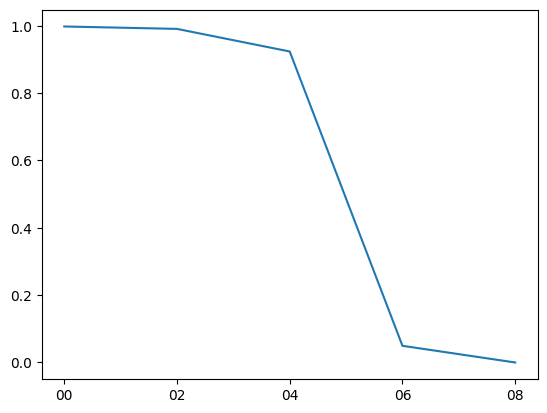

In [6]:
iters = 25
algs = {"FLPA": fast_label_propagation, "Infomap": algorithms.infomap, "Louvain": algorithms.louvain}
res = {alg: [] for alg in algs.keys()}
mis = ["00", "02", "04", "06", "08"]

plt.figure()
for alg in algs:
    for mi in mis:
        nmi = 0
        for i in range(iters):
            netpath = f"WHOLE/LFR_{mi}_{i}.net"
            print(netpath)
            G = nx.convert_node_labels_to_integers(read_with_clusters(netpath))
            K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nmi += K.normalized_mutual_information(C).score
        nmi /= iters
        res[alg].append(nmi)
    plt.plot(mis, res[alg], label=alg)

plt.xlabel('$\mu$')
plt.ylabel('NMI')
plt.legend()

In [ ]:
iters = 25
n = 1000
algs = {"FLPA": fast_label_propagation, "Infomap": algorithms.infomap, "Louvain": algorithms.louvain}
res = {alg: [] for alg in algs.keys()}
degrees = [8, 16, 24, 32, 40]

plt.figure()
for alg in algs:
    for deg in degrees:
        print(f"{alg}, {deg}")
        nvi = 0
        for i in range(iters):
            G = nx.MultiGraph(nx.gnm_random_graph(n, deg*n/2))
            cc = nx.connected_components(G)
            K = NodeClustering(list(cc), G)
            #K = known_clustering(G, cluster_attr='cluster')
            C = algs[alg](G)
            nvi += K.variation_of_information(C).score / np.log(n)
        nvi /= iters
        res[alg].append(nvi)
    plt.plot(degrees, res[alg], label=alg)

plt.xlabel('Average degree')
plt.ylabel('NVI')
plt.legend()

In [8]:
# Peta
G = nx.Graph(nx.convert_node_labels_to_integers(read_with_clusters('aps_2008_2013.net')))
G13 = [i for i in range(len(G)) if G.nodes()[i]['label'].endswith('-2013"')]
MG = nx.MultiGraph(G)
C = fast_label_propagation(MG)
print(C.communities)


[[43249, 38619, 39341, 40282, 41185, 40751, 40966, 39340, 79144, 38775, 42537, 43030, 40021, 39003, 42020, 42609, 41728, 43343, 41872, 38981, 41874, 42260, 42832, 38665, 41122, 40739, 39945, 39550, 39743, 39823, 81522, 40160, 42088, 41941, 42889, 40684, 41116, 42189, 40830, 73897, 41414, 43267, 38810, 72980, 42531, 87323, 41200, 43119, 39238, 40093, 39464, 42034, 42928, 70292], [48799, 54604, 45215, 44586, 46867, 45645, 57458, 49050, 73689, 47621, 47858, 46875, 48211, 46356, 45641], [82399, 58561, 75169, 52012, 48136, 50934, 48755, 46133, 87915, 57706, 75349, 47345, 87952, 48352, 47783, 48374, 46526, 48938, 47848, 47118, 56056, 49795, 75719, 47947, 45767, 46866, 45399, 49519, 56441, 48373, 55732, 47520, 48328, 44478, 75161, 50011, 55712, 49822, 58793, 50714, 50581, 58548, 79946, 74957, 56335, 57997, 54455, 54255, 47715, 47132, 46529, 45923, 48948, 48958, 86381, 50722, 46739, 54072, 57944, 50453, 55741, 57042, 50240, 56997, 72615, 55028, 54799, 69785, 54256, 78750, 58770, 46672, 58001, 

In [9]:
kc = algorithms.infomap(G)
print(kc)

KeyboardInterrupt: 

In [ ]:
correct = 0
for node in G13:
    right_cluster = []
    for c in C.communities:
        if node in c:
            right_cluster = c
            break
    journals = [G.nodes()[n]['cluster'] for n in right_cluster if not G.nodes()[n]['label'].endswith('-2013"')]
    most = Counter(journals).most_common()
    if len(most) == 0:
        most = [(random.randint(1,10), 0)]
    predicted = G.nodes()[node]['cluster']
    if most[0][0] == predicted:
        correct += 1
acc = correct*100/len(G13)
print(f"Accuracy: {acc}%")

In [22]:
#C = algorithms.label_propagation(G)
def get_neighbourhood(G, node, level=3):
    neighbourhood = set()
    queue = deque([node])
    for _ in range(level):
        current = deque()
        while queue:
            current.extend([n for n in G[queue.popleft()]])
        while current:
            n = current.popleft()
            if n not in neighbourhood:
                neighbourhood.add(n)
                queue.append(n)
    return list(neighbourhood)

G = nx.Graph(nx.convert_node_labels_to_integers(read_with_clusters('aps_2008_2013.net')))
G13 = [i for i in range(len(G)) if G.nodes()[i]['label'].endswith('-2013"')]
iters = 10
accuracies = []
for i in range(iters):
    correct = 0
    print(f"Iteration {i}")
    for node in G13:
        right_cluster = get_neighbourhood(G, node, level=2)
        journals = [G.nodes()[n]['cluster'] for n in right_cluster 
                    if not G.nodes()[n]['label'].endswith('-2013"')]
        most = Counter(journals).most_common()
        if len(most) == 0:
            most = [(random.randint(1,10), 0)]
        predicted = G.nodes()[node]['cluster']
        if most[0][0] == predicted:
            correct += 1
    acc = correct*100/len(G13)
    print(f"Accuracy: {acc}%")
    accuracies.append(acc)
print(accuracies)
print(sum(accuracies)/len(accuracies))

Iteration 0
Accuracy: 70.66581713921632%
Iteration 1
Accuracy: 70.66581713921632%
[70.66581713921632, 70.66581713921632]
70.66581713921632


In [10]:
# Sesta
def pai(G, i, j, *kwargs):
    return len(G[i]) * len(G[j])

def aai(G, i, j, *kwargs):
    nbhd = set(G[i]).union(set(G[j]))
    return sum([1/np.log(len(G[node])) for node in nbhd])

def lci(G, i, j, C2, node_to_cluster, cluster_to_m):
    C = C2.communities
    ci = node_to_cluster[i]
    cj = node_to_cluster[j]
    if ci != cj:
        return 0
    nc = len(C[ci])
    mc = cluster_to_m[ci]
    return 2*mc/(nc*(nc-1))

def framework(G2: nx.Graph, s):
    G = nx.Graph(G2)
    nodes = list(G)
    m = G.number_of_edges()
    Ln = set()
    while len(Ln) < m//10:
        i, j = random.sample(nodes, 2)
        if i not in G[j] and (i,j) not in Ln and (j, i) not in Ln:
            Ln.add((i,j))
    edges = list(G.edges)
    Lp = set(random.sample(edges, m//10))
    G.remove_edges_from(Lp)
    union = Ln.union(Lp)

    results = {}
    C = []
    node_to_cluster = {}
    cluster_to_m = {}
    if s == lci:
        C = algorithms.leiden(G2)
        for ix, cluster in enumerate(C.communities):
            SG = nx.induced_subgraph(G2, cluster)
            cluster_to_m[ix] = SG.number_of_edges()
        for ix, cluster in enumerate(C.communities):
            for node in cluster:
                node_to_cluster[node] = ix
    for ix, (i, j) in enumerate(union):
        results[i,j] = s(G, i, j, C, node_to_cluster, cluster_to_m)
    mp = 0
    mpp = 0
    smpp = random.choices(list(Lp), k=m//10)
    smpn = random.choices(list(Ln), k=m//10)
    for (ipos, jpos), (ineg, jneg) in zip(smpp, smpn):
        sp = results[ipos, jpos]
        sn = results[ineg, jneg]
        if sp > sn:
            mp += 1
        elif sp == sn:
            mpp += 1
    return (mp+mpp/2)/(m/10)

6
3.9101632409913716
0.0010046913353387373


In [12]:
networks = ['er', 'gnutella.net', 'circles.net', 'nec.net']
lpms = [pai, aai, lci]
iters = 10
res = {nw: [] for nw in networks}
for nw in networks:
    print(nw)
    G = None
    if nw == 'er':
        G = nx.gnm_random_graph(25000, 250000/2)
    else:
        G = nx.read_pajek(nw)
    for s in lpms:
        aucs = []
        for i in range(iters):
            print(i)
            aucs.append(framework(G, s))
        res[nw].append(sum(aucs)/len(aucs))
print(res)

er
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
gnutella.net
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
circles.net
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
nec.net
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
